**Question 3**

[Google Colab](https://colab.research.google.com/drive/1dE7SHMRpYUCKKTS_rTev-jPIGPAytmCL?usp=sharing)

In [1]:
# Clone necessary repositories
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 576, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 576 (delta 199), reused 188 (delta 188), pack-reused 354
Receiving objects: 100% (576/576), 6.48 MiB | 10.35 MiB/s, done.
Resolving deltas: 100% (336/336), done.
Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 187 (delta 25), reused 20 (delta 20), pack-reused 159
Receiving objects: 100% (187/187), 3.86 MiB | 12.15 MiB/s, done.
Resolving deltas: 100% (62/62), done.
ETDataset  Informer2020  sample_data


In [2]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [3]:
# Import required modules and libraries
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [4]:
# Define configuration settings
args = dotdict()
args.model = 'informer'
args.data = 'ETTh1'
args.root_path = './ETDataset/ETT-small/'
args.data_path = 'ETTh1.csv'
args.features = 'M'
args.target = 'OT'
args.freq = 'h'
args.checkpoints = './informer_checkpoints'

args.seq_len = 96
args.label_len = 48
args.pred_len = 24

args.enc_in = 7
args.dec_in = 7
args.c_out = 7
args.factor = 5
args.d_model = 512
args.n_heads = 8
args.e_layers = 2
args.d_layers = 1
args.d_ff = 2048
args.dropout = 0.05
args.attn = 'prob'
args.embed = 'timeF'
args.activation = 'gelu'
args.distil = True
args.output_attention = False
args.mix = True
args.padding = 0
args.freq = 'h'

args.batch_size = 32
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False

args.num_workers = 0
args.itr = 1
args.train_epochs = 6
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'

In [5]:
# Check if GPU is available and whether to use it
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [6]:
# Define data parser for specific datasets
data_parser = {
    'ETTh1':{'data':'ETTh1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
}

# Update args based on selected dataset
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [7]:
# Store original frequency and update it
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [8]:
# Print experiment parameters
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'ETTh1', 'root_path': './ETDataset/ETT-small/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}


In [9]:
# Define the Experiment class as Exp
Exp = Exp_Informer

In [10]:
# Lists to store MSE and MAE values
mse_values_ETTh1 = []
mae_values_ETTh1 = []

In [11]:
# Iterate over multiple experiments
for ii in range(args.itr):
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features,
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # Create an instance of Exp with args
    exp = Exp(args)

    # Training phase
    print(f'---------------------- Start training: {setting} ---------------------->')
    exp.train(setting)

    # Testing phase
    print(f'---------------------- Testing: {setting} ----------------------')
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
---------------------- Start training: informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0 ---------------------->
train 8521
val 2857
test 2857
	iters: 100, epoch: 1 | loss: 0.4176451
	speed: 0.1612s/iter; left time: 241.3340s
	iters: 200, epoch: 1 | loss: 0.2839203
	speed: 0.0680s/iter; left time: 95.0075s
Epoch: 1 cost time: 26.66838788986206
Epoch: 1, Steps: 266 | Train Loss: 0.4108154 Vali Loss: 0.6812510 Test Loss: 0.6977645
Validation loss decreased (inf --> 0.681251).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.2701063
	speed: 0.1592s/iter; left time: 195.9868s
	iters: 200, epoch: 2 | loss: 0.2239746
	speed: 0.0687s/iter; left time: 77.6854s
Epoch: 2 cost time: 18.361802339553833
Epoch: 2, Steps: 266 | Train Loss: 0.2580339 Vali Loss: 0.7077112 Test Loss: 0.6714078
EarlyStopping counter: 1 out of 3
Updating learning rate to 5e-05
	iters: 100, epoch: 3 | loss: 0.1982990
	speed: 0

In [12]:
import os

# Load a specific experiment setting for prediction
setting = 'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'

In [13]:
exp = Exp(args)

# Generate predictions for the loaded setting
exp.predict(setting, True)

Use GPU: cuda:0
pred 1


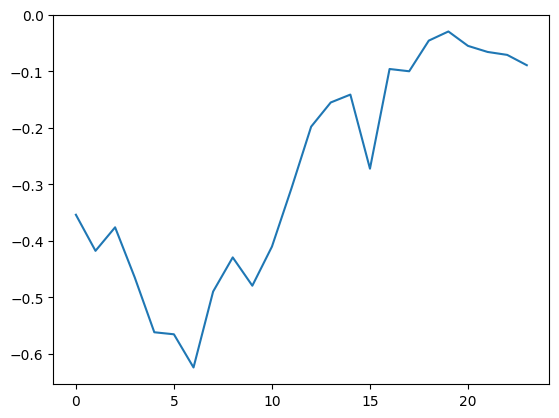

In [14]:
# Import necessary libraries for plotting
import numpy as np
import matplotlib.pyplot as plt

# Load metrics for the specified setting
metrics_path = './results/' + setting + '/metrics.npy'
metrics = np.load(metrics_path)

# Append metrics values to respective lists
mae_values_ETTh1.append(metrics[0])
mse_values_ETTh1.append(metrics[1])

# Load real predictions for plotting
prediction = np.load('./results/'+setting+'/real_prediction.npy')
prediction.shape

plt.figure()
plt.plot(prediction[0, :, -1])
plt.show()

In [15]:
# Define a function to generate predictions
def predict(exp, setting, load=False):
    pred_data, pred_loader = exp._get_data(flag='pred')

    # Load the best model if specified
    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    # Set the model to evaluation mode
    exp.model.eval()

    preds = []

    # Iterate over prediction loader
    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # Define the decoding input based on padding
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)

        # Apply automatic mixed precision if specified
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

        # Extract target dimensions based on features
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)

        # Convert predictions to numpy array
        pred = outputs.detach().cpu().numpy()#.squeeze()

        # Append predictions to the list
        preds.append(pred)

    # Convert predictions to numpy array and reshape
    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])

    # Define folder path to store predictions
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save real predictions to a file
    np.save(folder_path+'real_prediction.npy', preds)

    return preds


In [16]:
# Generate predictions for a specific setting
prediction = predict(exp, setting, True)

pred 1


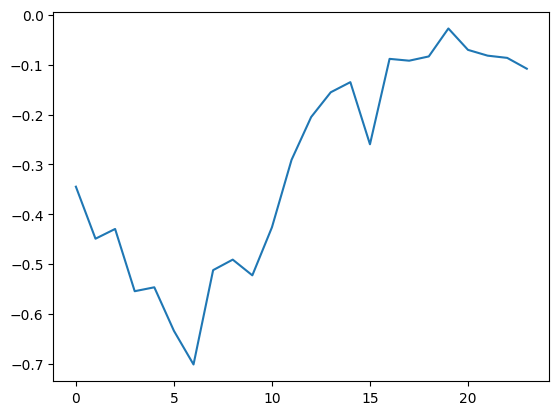

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

In [18]:
# Import necessary modules for data loading
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader

In [19]:
# Define data set and data loader for prediction
Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

freq = args.detail_freq

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=freq
)

data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [20]:
# Print lengths of data set and data loader
len(data_set), len(data_loader)

(1, 1)

In [21]:
# Load predictions and ground truth values
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

# Print shapes of predictions and ground truth
preds.shape, trues.shape

((2848, 24, 7), (2848, 24, 7))

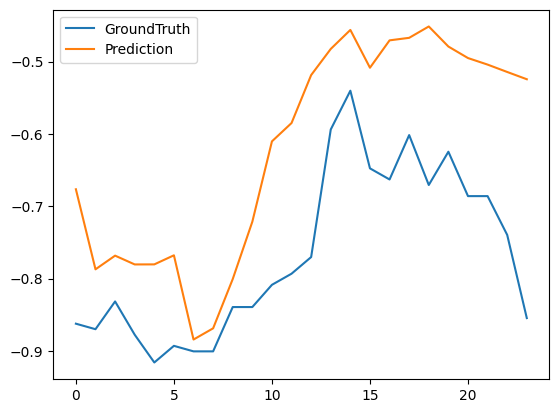

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw OT prediction
plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

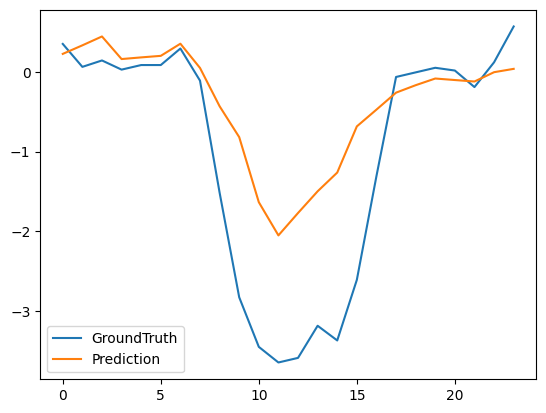

In [23]:
# Draw HUFL prediction
plt.figure()
plt.plot(trues[0,:,0], label='GroundTruth')
plt.plot(preds[0,:,0], label='Prediction')
plt.legend()
plt.show()

pred 1


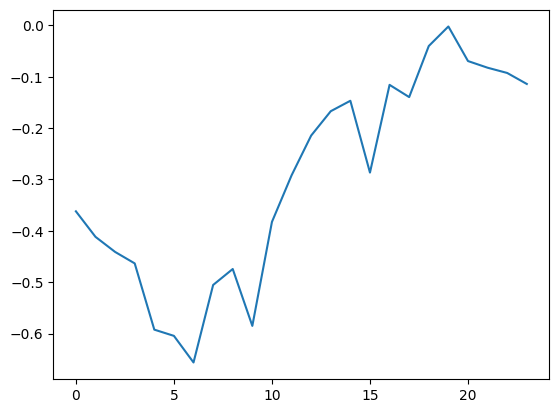

In [24]:
import matplotlib.pyplot as plt

# Load predictions for the current setting and plot
exp.predict(setting, True)
prediction = np.load('./results/' + setting + '/real_prediction.npy')

# Plot predictions
plt.figure()
plt.plot(prediction[0, :, -1])
plt.show()

In [25]:
# Update prediction length
args.pred_len = 48

# Define data parser for specific datasets
data_parser = {
    'ETTh1':{'data':'ETTh1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
}

# Update args based on selected dataset
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

# Store original frequency and update it
args.detail_freq = args.freq
args.freq = args.freq[-1:]

# Print experiment parameters
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'ETTh1', 'root_path': './ETDataset/ETT-small/', 'data_path': 'ETTh1.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 48, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}


In [26]:
# Define the Experiment class as Exp
Exp = Exp_Informer

In [27]:
# Iterate over multiple experiments
for ii in range(args.itr):
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features,
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # Create an instance of Exp with args
    exp = Exp(args)

    # Training phase
    print(f'---------------------- Start training: {setting} ---------------------->')
    exp.train(setting)

    # Testing phase
    print(f'---------------------- Testing: {setting} ----------------------')
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
---------------------- Start training: informer_ETTh1_ftM_sl96_ll48_pl48_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0 ---------------------->
train 8497
val 2833
test 2833
	iters: 100, epoch: 1 | loss: 0.5076429
	speed: 0.0796s/iter; left time: 118.6213s
	iters: 200, epoch: 1 | loss: 0.3641823
	speed: 0.0792s/iter; left time: 110.2334s
Epoch: 1 cost time: 21.071688652038574
Epoch: 1, Steps: 265 | Train Loss: 0.4608961 Vali Loss: 0.8525839 Test Loss: 0.7604914
Validation loss decreased (inf --> 0.852584).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.3038672
	speed: 0.1846s/iter; left time: 226.3141s
	iters: 200, epoch: 2 | loss: 0.2712258
	speed: 0.0800s/iter; left time: 90.0798s
Epoch: 2 cost time: 21.16116738319397
Epoch: 2, Steps: 265 | Train Loss: 0.3079294 Vali Loss: 0.8400305 Test Loss: 0.8349155
Validation loss decreased (0.852584 --> 0.840030).  Saving model ...
Updating learning rate to 5e-05
	iters: 100, 

In [28]:
import os

# Load a specific experiment setting for prediction
setting = 'informer_ETTh1_ftM_sl96_ll48_pl48_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'

In [29]:
exp = Exp(args)

# Generate predictions for the loaded setting
exp.predict(setting, True)

Use GPU: cuda:0
pred 1


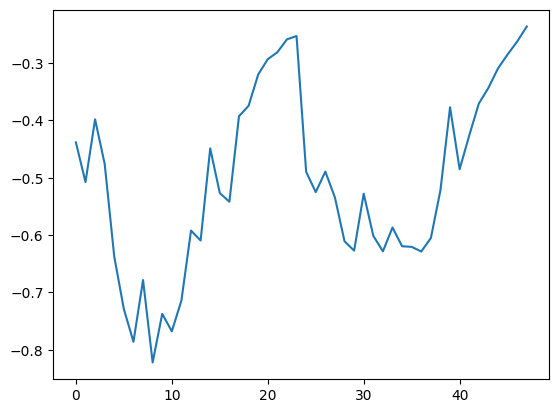

In [30]:
# Import necessary libraries for plotting
import numpy as np
import matplotlib.pyplot as plt

# Load metrics for the specified setting
metrics_path = './results/' + setting + '/metrics.npy'
metrics = np.load(metrics_path)

# Append metrics values to respective lists
mae_values_ETTh1.append(metrics[0])
mse_values_ETTh1.append(metrics[1])

# Load real predictions for plotting
prediction = np.load('./results/'+setting+'/real_prediction.npy')
prediction.shape

plt.figure()
plt.plot(prediction[0, :, -1])
plt.show()

In [31]:
# Display the results in a table
from tabulate import tabulate

# Print the dataset name
print(args.data)
time_intervals = [24, 48]

# Define paper metrics values for comparison
paper_mse_values = [0.577, 0.685]
paper_mae_values = [0.549, 0.625]

# Create a table with metric values for both paper and the current experiment
data = [
    ["Metric", "Paper MSE", "My MSE", "Paper MAE", "My MAE"],
    [time_intervals[0], paper_mse_values[0], mse_values_ETTh1[0], paper_mae_values[0], mae_values_ETTh1[0]],
    [time_intervals[1], paper_mse_values[1], mse_values_ETTh1[1], paper_mae_values[1], mae_values_ETTh1[1]],
]

# Generate the table with headers and specified format
table = tabulate(data, headers="firstrow", tablefmt="grid")
print(table)


ETTh1
+----------+-------------+----------+-------------+----------+
|   Metric |   Paper MSE |   My MSE |   Paper MAE |   My MAE |
+==========+=============+==========+=============+==========+
|       24 |       0.577 | 0.708312 |       0.549 | 0.627375 |
+----------+-------------+----------+-------------+----------+
|       48 |       0.685 | 0.885557 |       0.625 | 0.730762 |
+----------+-------------+----------+-------------+----------+


In [32]:
# Load predictions and ground truth
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

preds.shape, trues.shape

((2816, 48, 7), (2816, 48, 7))

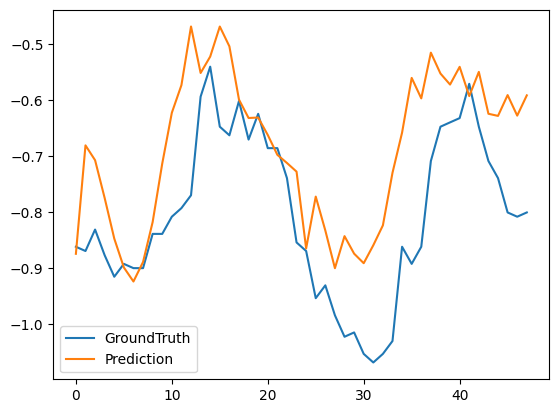

In [33]:
# Visualize prediction against ground truth
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

In [34]:
# Update args
args.data = 'ETTm2'
args.data_path = 'ETTm2.csv'
args.pred_len = 24

In [35]:
# Update data parser for the new dataset
data_parser = {
    'ETTm2':{'data':'ETTm2.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
}

# Update args based on the new dataset
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [36]:
# Update frequency details and frequency
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [37]:
# Print experiment parameters
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'ETTm2', 'root_path': './ETDataset/ETT-small/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}


In [38]:
# Define the Experiment class as Exp
Exp = Exp_Informer

In [39]:
# Lists to store MSE and MAE values
mse_values_ETTm2 = []
mae_values_ETTm2 = []

In [40]:
# Iterate over multiple experiments
for ii in range(args.itr):
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features,
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # Create an instance of Exp with args
    exp = Exp(args)

    # Training phase
    print(f'---------------------- Start training: {setting} ---------------------->')
    exp.train(setting)

    # Testing phase
    print(f'---------------------- Testing: {setting} ----------------------')
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
---------------------- Start training: informer_ETTm2_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0 ---------------------->
train 34441
val 11497
test 11497
	iters: 100, epoch: 1 | loss: 0.3168448
	speed: 0.0737s/iter; left time: 468.8134s
	iters: 200, epoch: 1 | loss: 0.1563154
	speed: 0.0741s/iter; left time: 463.4777s
	iters: 300, epoch: 1 | loss: 0.0917009
	speed: 0.0736s/iter; left time: 453.0227s
	iters: 400, epoch: 1 | loss: 0.0990604
	speed: 0.0742s/iter; left time: 449.2549s
	iters: 500, epoch: 1 | loss: 0.1461966
	speed: 0.0742s/iter; left time: 442.0625s
	iters: 600, epoch: 1 | loss: 0.0975468
	speed: 0.0738s/iter; left time: 432.3869s
	iters: 700, epoch: 1 | loss: 0.1430475
	speed: 0.0742s/iter; left time: 427.3874s
	iters: 800, epoch: 1 | loss: 0.1111932
	speed: 0.0737s/iter; left time: 416.7447s
	iters: 900, epoch: 1 | loss: 0.1277754
	speed: 0.0742s/iter; left time: 412.1888s
	iters: 1000, epoch: 1 | loss: 0.1594207
	s

In [41]:
import os

# Load a specific experiment setting for prediction
setting = 'informer_ETTm2_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'

In [42]:
exp = Exp(args)

# Generate predictions for the loaded setting
exp.predict(setting, True)

Use GPU: cuda:0
pred 1


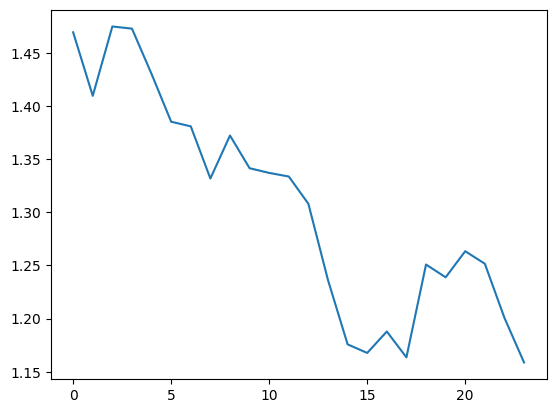

In [43]:
# Import necessary libraries for plotting
import numpy as np
import matplotlib.pyplot as plt

# Load metrics for the specified setting
metrics_path = './results/' + setting + '/metrics.npy'
metrics = np.load(metrics_path)

# Append metrics values to respective lists
mae_values_ETTm2.append(metrics[0])
mse_values_ETTm2.append(metrics[1])

# Load real predictions for plotting
prediction = np.load('./results/'+setting+'/real_prediction.npy')
prediction.shape

# Plot predictions
plt.figure()
plt.plot(prediction[0, :, -1])
plt.show()

In [44]:
# Define a function to generate predictions
def predict(exp, setting, load=False):
    pred_data, pred_loader = exp._get_data(flag='pred')

    # Load the best model if specified
    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    # Set the model to evaluation mode
    exp.model.eval()

    preds = []

    # Iterate over prediction loader
    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # Define the decoding input based on padding
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)

        # Apply automatic mixed precision if specified
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

        # Extract target dimensions based on features
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)

        # Convert predictions to numpy array
        pred = outputs.detach().cpu().numpy()#.squeeze()

        # Append predictions to the list
        preds.append(pred)

    # Convert predictions to numpy array and reshape
    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])

    # Define folder path to store predictions
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save real predictions to a file
    np.save(folder_path+'real_prediction.npy', preds)

    return preds


In [45]:
# Generate predictions for a specific setting
prediction = predict(exp, setting, True)

pred 1


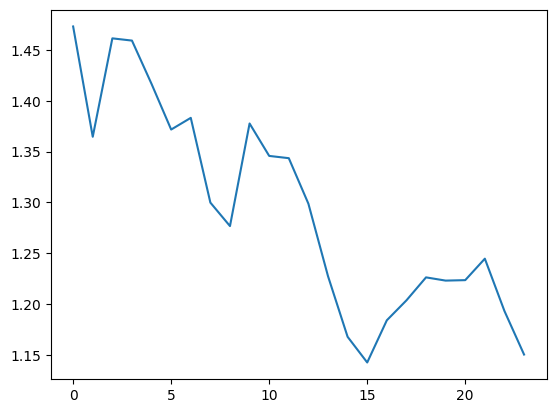

In [46]:
import matplotlib.pyplot as plt

# Plot predictions
plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

In [47]:
# Import necessary modules for data loading
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader

In [48]:
# Define data set and data loader for prediction
Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

freq = args.detail_freq

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=freq
)

data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [49]:
# Print lengths of data set and data loader
len(data_set), len(data_loader)

(1, 1)

In [50]:
# Load predictions and ground truth values
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

# Print shapes of predictions and ground truth
preds.shape, trues.shape

((11488, 24, 7), (11488, 24, 7))

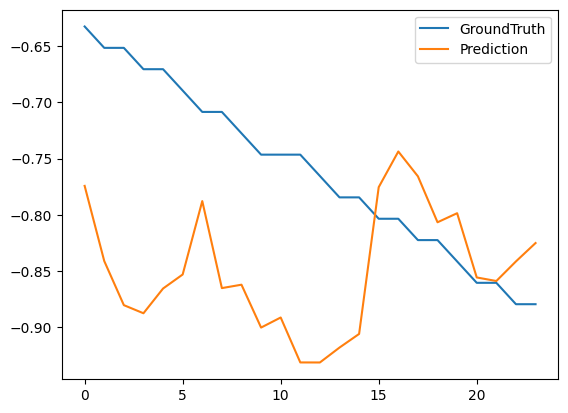

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw OT prediction
plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

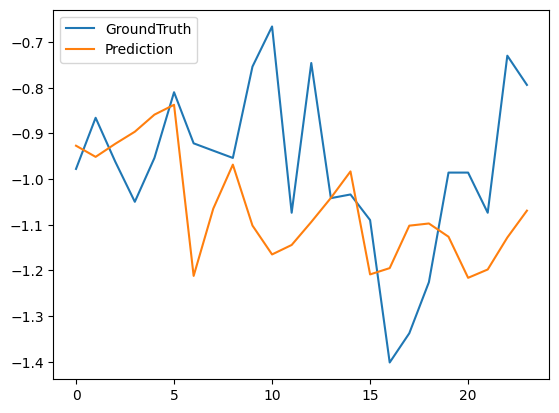

In [52]:
# Draw HUFL prediction
plt.figure()
plt.plot(trues[0,:,0], label='GroundTruth')
plt.plot(preds[0,:,0], label='Prediction')
plt.legend()
plt.show()

pred 1


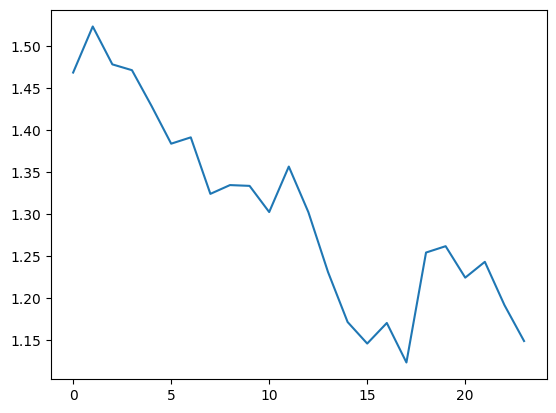

In [53]:
import matplotlib.pyplot as plt

# Load predictions for the current setting and plot
exp.predict(setting, True)
prediction = np.load('./results/' + setting + '/real_prediction.npy')

# Plot predictions
plt.figure()
plt.plot(prediction[0, :, -1])
plt.show()

In [54]:
# Update prediction length
args.pred_len = 48

# Define data parser for specific datasets
data_parser = {
    'ETTm2':{'data':'ETTm2.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
}

# Update args based on selected dataset
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

# Store original frequency and update it
args.detail_freq = args.freq
args.freq = args.freq[-1:]

# Print experiment parameters
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'ETTm2', 'root_path': './ETDataset/ETT-small/', 'data_path': 'ETTm2.csv', 'features': 'M', 'target': 'OT', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 48, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}


In [55]:
# Define the Experiment class as Exp
Exp = Exp_Informer

In [56]:
# Iterate over multiple experiments
for ii in range(args.itr):
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features,
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # Create an instance of Exp with args
    exp = Exp(args)

    # Training phase
    print(f'---------------------- Start training: {setting} ---------------------->')
    exp.train(setting)

    # Testing phase
    print(f'---------------------- Testing: {setting} ----------------------')
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
---------------------- Start training: informer_ETTm2_ftM_sl96_ll48_pl48_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0 ---------------------->
train 34417
val 11473
test 11473
	iters: 100, epoch: 1 | loss: 0.2923701
	speed: 0.0812s/iter; left time: 515.7767s
	iters: 200, epoch: 1 | loss: 0.2976425
	speed: 0.0809s/iter; left time: 505.8650s
	iters: 300, epoch: 1 | loss: 0.2404502
	speed: 0.0812s/iter; left time: 499.2188s
	iters: 400, epoch: 1 | loss: 0.1450650
	speed: 0.0812s/iter; left time: 491.4176s
	iters: 500, epoch: 1 | loss: 0.1455413
	speed: 0.0811s/iter; left time: 482.7574s
	iters: 600, epoch: 1 | loss: 0.1330768
	speed: 0.0811s/iter; left time: 474.5293s
	iters: 700, epoch: 1 | loss: 0.1164551
	speed: 0.0810s/iter; left time: 465.8032s
	iters: 800, epoch: 1 | loss: 0.1559894
	speed: 0.0811s/iter; left time: 458.2334s
	iters: 900, epoch: 1 | loss: 0.1079304
	speed: 0.0813s/iter; left time: 451.2928s
	iters: 1000, epoch: 1 | loss: 0.1397214
	s

In [57]:
import os

# Load a specific experiment setting for prediction
setting = 'informer_ETTm2_ftM_sl96_ll48_pl48_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'

In [58]:
exp = Exp(args)

# Generate predictions for the loaded setting
exp.predict(setting, True)

Use GPU: cuda:0
pred 1


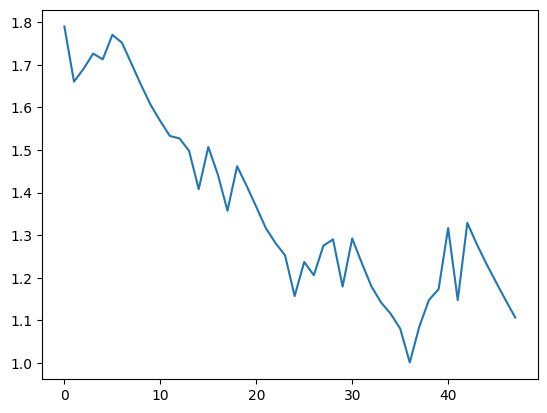

In [59]:
# Import necessary libraries for plotting
import numpy as np
import matplotlib.pyplot as plt

# Load metrics for the specified setting
metrics_path = './results/' + setting + '/metrics.npy'
metrics = np.load(metrics_path)

# Append metrics values to respective lists
mae_values_ETTm2.append(metrics[0])
mse_values_ETTm2.append(metrics[1])

# Load real predictions for plotting
prediction = np.load('./results/'+setting+'/real_prediction.npy')
prediction.shape

# Plot predictions
plt.figure()
plt.plot(prediction[0, :, -1])
plt.show()

In [60]:
# Display the results in a table
from tabulate import tabulate

# Print the dataset name
print(args.data)
time_intervals = [24, 48]

# Define paper metrics values for comparison
paper_mse_values = [0.323, 0.494]
paper_mae_values = [0.369, 0.503]

# Create a table with metric values for both paper and the current experiment
data = [
    ["Metric", "Paper MSE", "My MSE", "Paper MAE", "My MAE"],
    [time_intervals[0], paper_mse_values[0], mse_values_ETTm2[0], paper_mae_values[0], mae_values_ETTm2[0]],
    [time_intervals[1], paper_mse_values[1], mse_values_ETTm2[1], paper_mae_values[1], mae_values_ETTm2[1]],
]

# Generate the table with headers and specified format
table = tabulate(data, headers="firstrow", tablefmt="grid")
print(table)


ETTm2
+----------+-------------+----------+-------------+----------+
|   Metric |   Paper MSE |   My MSE |   Paper MAE |   My MAE |
+==========+=============+==========+=============+==========+
|       24 |       0.323 | 0.210248 |       0.369 | 0.342157 |
+----------+-------------+----------+-------------+----------+
|       48 |       0.494 | 0.283128 |       0.503 | 0.400616 |
+----------+-------------+----------+-------------+----------+


In [61]:
# Load predictions and ground truth
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

preds.shape, trues.shape

((11456, 48, 7), (11456, 48, 7))

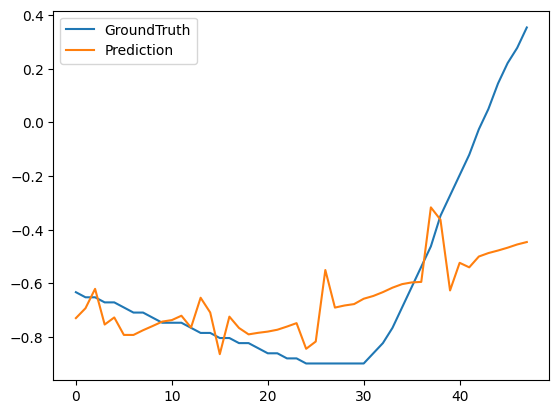

In [62]:
# Visualize prediction against ground truth
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

In [63]:
from tabulate import tabulate

# Display results for ETTh1
print('ETTh1')
time_intervals = [24, 48]

# Define univariate metrics values for comparison
univariate_mse_values = [0.143411, 0.186917]
univariate_mae_values = [0.322629, 0.366593]

# Create a table with metric values for both univariate and multivariate
data = [
    ["Metric", "Univariate MSE", "Multivariate MSE", "Univariate MAE", "Multivariate MAE"],
    [time_intervals[0], univariate_mse_values[0], mse_values_ETTh1[0], univariate_mae_values[0], mae_values_ETTh1[0]],
    [time_intervals[1], univariate_mse_values[1], mse_values_ETTh1[1], univariate_mae_values[1], mae_values_ETTh1[1]],
]

# Generate the table for ETTh1
table = tabulate(data, headers="firstrow", tablefmt="grid")
print(table)

# Display results for ETTm2
print('ETTm2')
time_intervals = [24, 48]

# Define univariate metrics values for comparison
univariate_mse_values = [0.0247119, 0.0528456]
univariate_mae_values = [0.1147, 0.170848]

# Create a table with metric values for both univariate and multivariate
data = [
    ["Metric", "Univariate MSE", "Multivariate MSE", "Univariate MAE", "Multivariate MAE"],
    [time_intervals[0], univariate_mse_values[0], mse_values_ETTm2[0], univariate_mae_values[0], mae_values_ETTm2[0]],
    [time_intervals[1], univariate_mse_values[1], mse_values_ETTm2[1], univariate_mae_values[1], mae_values_ETTm2[1]],
]

# Generate the table for ETTm2
table = tabulate(data, headers="firstrow", tablefmt="grid")
print(table)


ETTh1
+----------+------------------+--------------------+------------------+--------------------+
|   Metric |   Univariate MSE |   Multivariate MSE |   Univariate MAE |   Multivariate MAE |
+==========+==================+====================+==================+====================+
|       24 |         0.143411 |           0.708312 |         0.322629 |           0.627375 |
+----------+------------------+--------------------+------------------+--------------------+
|       48 |         0.186917 |           0.885557 |         0.366593 |           0.730762 |
+----------+------------------+--------------------+------------------+--------------------+
ETTm2
+----------+------------------+--------------------+------------------+--------------------+
|   Metric |   Univariate MSE |   Multivariate MSE |   Univariate MAE |   Multivariate MAE |
+==========+==================+====================+==================+====================+
|       24 |        0.0247119 |           0.210248 |      